In [ ]:
path1 = 'ocean_data_challenge_F1_data/singapore_grand_prix_races_2018-2019-2022-2023/'
path2 = 'ocean_data_challenge_F1_data/races_2024/'
for full_name in os.listdir(path1):
    name = full_name.split(".")[0]
    df = pd.read_csv(path1+full_name)
    print(f'{orange}{bold}{name} : {reset} {df.shape} ')
    for col in df.columns:
       print(f'{bold}{col} : {reset} |nnull: {yellow}{df[col].isnull().sum()} {reset} |nunique: {green}{df[col].nunique()} {reset} | {red}{df[col].dtype} {reset}|{blue}{list (df[col].head(10))} {reset} ' )


In [ ]:
path = 'ocean_data_challenge_F1_data/races_2024/'
for full_name in os.listdir(path):
    name = full_name.split(".")[0]
    df = pd.read_csv(path+full_name)
    print(f'{orange}{bold}{name} : {reset} {df.shape} ')
    for col in df.columns:
       print(f'{bold}{col} : {reset} |nnull: {yellow}{df[col].isnull().sum()} {reset} |nunique: {green}{df[col].nunique()} {reset} | {red}{df[col].dtype} {reset}|{blue}{list (df[col].head(10))} {reset} ' )


### **Relationship 1:Tire Compound Choice vs Lap Time** 10 points

Task: Investigate how different tire compounds (e.g., Soft, Medium, Hard) correlate with lap times throughout the race.

Objective: Identify which tire compounds lead to faster lap times and whether this varies depending on the stint or race phase.


### **Relationship 2: Starting Tire Type vs Final Classification** 10 points

Task: Explore how starting the race on different tire compounds (Hard, Soft, Medium) impacts the final classification.

Objective: Understand whether the initial tire choice plays a significant role in determining race outcomes.


### **Relationship 3: Number of Laps on a Compound vs Delta Time** 10 points

Task: Explore the relationship between the number of laps driven on a particular tire compound and the delta time (change in lap times) over those laps.

Objective: Understand how tire wear affects performance, particularly how lap times degrade as tires wear out during a stint.

### **Relationship 4: Number of Stops vs Final Position** 10 points

Task: Analyze the relationship between the number of pit stops a driver makes and their final position in the race.

Objective: Understand how the frequency of pit stops impacts race outcomes, particularly whether fewer or more stops lead to better results.

### **Relationship 5: Race Length vs Strategy** 10 points

Task: Examine how the total number of laps in each race influenced the pit stop strategy and tire choices for teams and drivers.

Objective: Understand how race length affects strategic decisions, particularly in terms of the number of stops and tire choices.

### **Bonus Question** 5 points

Examine the relationship between attributes you consider significant in a race of your choice. Explain your reasoning for selecting these attributes and whether the race holds particular relevance.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/formula-1'
os.chdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [ ]:
black = '\033[30m'
red = '\033[31m'
green = '\033[32m'
yellow = '\033[33m'
blue = '\033[34m'
magenta = '\033[35m'
cyan = '\033[36m'
white = '\033[37m'
orange = "\033[38;5;208m"
bold = '\033[1m'
reset = '\033[0m'


In [ ]:
colors = {
    "Bold Red": "#FF0000",
    "Bold Green": "#00FF00",
    "Bold Magenta": "#FF00FF",

    "Bold Cyan": "#00FFFF",
    "Bold Blue": "#0000FF",
    "Bold Yellow": "#FFFF00",

    "Bold Orange": "#FFA500",
    "Bold Purple": "#800080",
    "Bold Pink": "#FFC0CB",
    "Bold Brown": "#A52A2A",
    "Bold Grey": "#808080",
    "Bold Black": "#000000",
      "Bold Neon Green": "#39FF14",
    "Bold Neon Pink": "#FF6EC7",
    "Bold Neon Blue": "#1B03A3",
    "Bold Neon Yellow": "#FFFF33",
    "Bold Neon Orange": "#FF5F1F",
    "Bold Dark Red": "#8B0000",
    "Bold Dark Green": "#006400",
    "Bold Dark Blue": "#00008B",
    "Bold Dark Orange": "#FF8C00",
    "Bold Dark Purple": "#4B0082",
    "Bold Dark Pink": "#FF1493",
    "Bold Dark Brown": "#654321",
    "Bold Dark Grey": "#A9A9A9",

    "Bold Light Yellow": "#FFFFE0",
     "Bold Light Blue": "#ADD8E6",
    "Bold Light Green": "#90EE90",
    "Bold Light Cyan": "#E0FFFF",
    "Bold Light Magenta": "#FFB6C1",
    "Bold Light Orange": "#FFDAB9",
    "Bold Light Purple": "#E6E6FA",
    "Bold Light Pink": "#FFDAB9",
    "Bold Light Brown": "#F5DEB3",

}

In [ ]:
def convert_to_timedelta(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_timedelta(df[col])
    return df

def conver_to_datetime(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_datetime(df[col])
    return df

def conver_deltatime_to_second (df , columns_name):
    for col in columns_name:
        df[f'{col}_in_sec'] = df[col].dt.total_seconds()
    return df

In [ ]:
lap_sing = pd.read_csv('ocean_data_challenge_F1_data/singapore_grand_prix_races_2018-2019-2022-2023//lap_singapore_grand_prix_2018-2019-2022-2023.csv')
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
merged_lap = pd.concat([lap_2024, lap_sing], ignore_index=True)
merged_lap

,EventName,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,Year
0,Bahrain Grand Prix,0 days 01:01:37.510000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaN,NaN,NaN,...,Red Bull Racing,0 days 00:59:59.911000,2024-03-02 15:03:42.342,12,1.0,False,NaN,False,False,NaN
1,Bahrain Grand Prix,0 days 01:03:13.806000,VER,1,0 days 00:01:36.296000,2.0,1.0,NaN,NaN,0 days 00:00:30.916000,...,Red Bull Racing,0 days 01:01:37.510000,2024-03-02 15:05:19.941,1,1.0,False,NaN,False,True,NaN
2,Bahrain Grand Prix,0 days 01:04:50.559000,VER,1,0 days 00:01:36.753000,3.0,1.0,NaN,NaN,0 days 00:00:30.999000,...,Red Bull Racing,0 days 01:03:13.806000,2024-03-02 15:06:56.237,1,1.0,False,NaN,False,True,NaN
3,Bahrain Grand Prix,0 days 01:06:27.206000,VER,1,0 days 00:01:36.647000,4.0,1.0,NaN,NaN,0 days 00:00:30.931000,...,Red Bull Racing,0 days 01:04:50.559000,2024-03-02 15:08:32.990,1,1.0,False,NaN,False,True,NaN
4,Bahrain Grand Prix,0 days 01:08:04.379000,VER,1,0 days 00:01:37.173000,5.0,1.0,NaN,NaN,0 days 00:00:31.255000,...,Red Bull Racing,0 days 01:06:27.206000,2024-03-02 15:10:09.637,1,1.0,False,NaN,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21462,NaN,0 days 02:43:23.690000,PIA,81,0 days 00:01:39.516000,58.0,2.0,NaN,NaN,0 days 00:00:28.760000,...,McLaren,0 days 02:41:44.174000,2023-09-17 13:42:44.685,12,8.0,False,NaN,False,True,2023.0
21463,NaN,0 days 02:45:03.118000,PIA,81,0 days 00:01:39.428000,59.0,2.0,NaN,NaN,0 days 00:00:28.846000,...,McLaren,0 days 02:43:23.690000,2023-09-17 13:44:24.201,21,8.0,False,NaN,False,True,2023.0
21464,NaN,0 days 02:46:42.307000,PIA,81,0 days 00:01:39.189000,60.0,2.0,NaN,NaN,0 days 00:00:28.727000,...,McLaren,0 days 02:45:03.118000,2023-09-17 13:46:03.629,1,8.0,False,NaN,False,True,2023.0
21465,NaN,0 days 02:48:21.923000,PIA,81,0 days 00:01:39.616000,61.0,2.0,NaN,NaN,0 days 00:00:28.891000,...,McLaren,0 days 02:46:42.307000,2023-09-17 13:47:42.818,1,8.0,False,NaN,False,True,2023.0


In [ ]:
deltaTime_cols = ['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time' ,
                  'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                  'LapStartTime', 'PitOutTime','PitInTime' ]

merged_lap= convert_to_timedelta(merged_lap , deltaTime_cols)

merged_lap = conver_deltatime_to_second (merged_lap , deltaTime_cols)
print(f'{orange}{bold} lap_2024 : {reset} {lap_2024.shape} ')


 lap_2024 :  (17123, 32) 


### **Relationship 1:Tire Compound Choice vs Lap Time**10 points

Task: Investigate how different tire compounds (e.g., Soft, Medium, Hard) correlate with lap times throughout the race.

Objective: Identify which tire compounds lead to faster lap times and whether this varies depending on the stint or race phase.

In [ ]:
grouped_data = merged_lap.groupby('Compound').agg({
            'LapNumber': lambda x : list(set(x)),
            'LapTime_in_sec': 'mean',
            'TyreLife' :  lambda x: np.count_nonzero(np.unique(x)),
            'Sector1Time_in_sec': 'mean',
            'Sector2Time_in_sec': 'mean',
            'Sector3Time_in_sec': 'mean',
        }, dropna=False).reset_index()
grouped_data

,Compound,LapNumber,LapTime_in_sec,TyreLife,Sector1Time_in_sec,Sector2Time_in_sec,Sector3Time_in_sec
0,HARD,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",92.751068,78,28.911646,34.717758,28.251695
1,HYPERSOFT,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",108.641651,29,32.192950,43.826966,39.235690
2,INTERMEDIATE,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",105.849241,44,30.514560,38.714672,38.399652
3,MEDIUM,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",93.747139,77,27.995900,35.147403,28.423713
4,SOFT,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",96.640873,55,29.322770,38.192945,29.897104
5,ULTRASOFT,"[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,...",108.426268,57,30.524814,42.426268,37.658570
6,WET,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",99.379474,12,28.081882,30.916684,38.916842


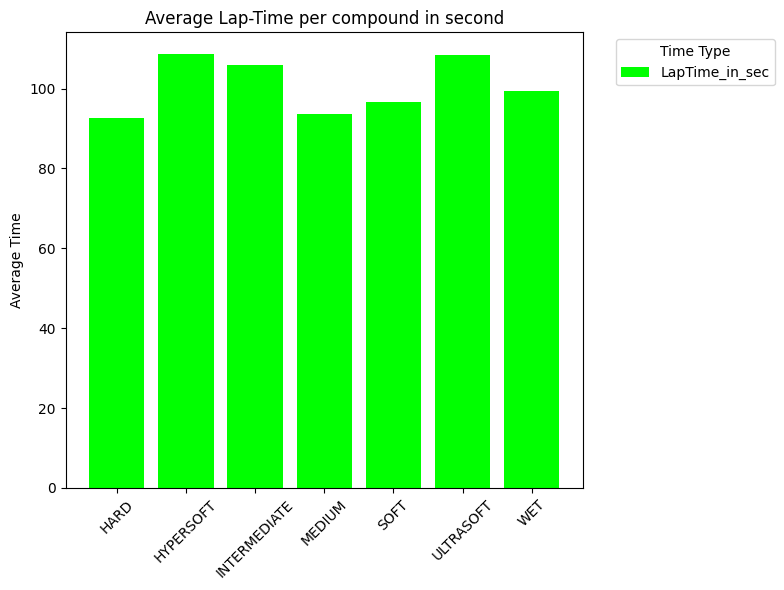

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(grouped_data['Compound'], grouped_data['LapTime_in_sec'], label='LapTime_in_sec' , color=list(colors.values())[1])
plt.ylabel('Average Time')
plt.title('Average Lap-Time per compound in second')
plt.xticks(rotation=45)
plt.legend(title='Time Type',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


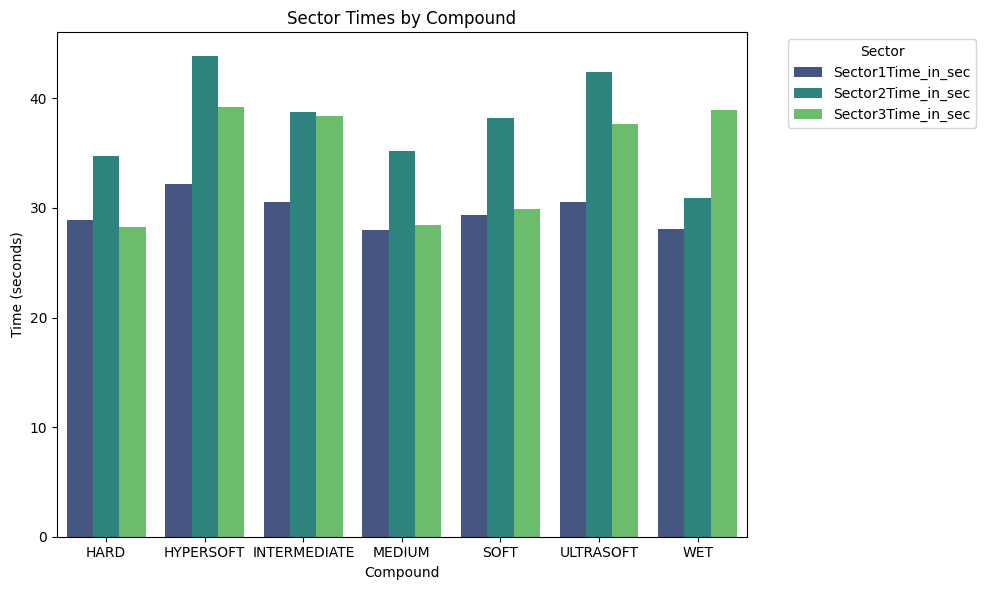

In [ ]:
melted_data = grouped_data.melt(id_vars='Compound', value_vars=['Sector1Time_in_sec', 'Sector2Time_in_sec', 'Sector3Time_in_sec'],
                        var_name='Sector', value_name='Time')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Compound', y='Time', hue='Sector', data=melted_data, palette='viridis')
plt.title('Sector Times by Compound')
plt.xlabel('Compound')
plt.ylabel('Time (seconds)')
plt.legend(title='Sector',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Relationship 2: Starting Tire Type vs Final Classification** 10 points

Task: Explore how starting the race on different tire compounds (Hard, Soft, Medium) impacts the final classification.

Objective: Understand whether the initial tire choice plays a significant role in determining race outcomes.



In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/result_2024.csv')
lap_sing = pd.read_csv('ocean_data_challenge_F1_data/singapore_grand_prix_races_2018-2019-2022-2023/lap_singapore_grand_prix_2018-2019-2022-2023.csv')
result_sing = pd.read_csv('ocean_data_challenge_F1_data/singapore_grand_prix_races_2018-2019-2022-2023/result_singapore_grand_prix_2018-2019-2022-2023.csv')
print(f'{orange}{bold} lap_sing : {reset} {lap_sing.shape} ')

# for col in lap_sing.columns:
#     print(f'{bold}{col} : {reset} |nnull: {yellow}{lap_sing[col].isnull().sum()} {reset} |nunique: {green}{lap_sing[col].nunique()} {reset} | {red}{lap_sing[col].dtype} {reset}|{blue}{list (lap_sing[col].head(5))} {reset} ' )
# print(f'{orange}{bold} result_sing : {reset} {result_sing.shape} ')

# for col in result_sing.columns:
#     print(f'{bold}{col} : {reset} |nnull: {yellow}{result_sing[col].isnull().sum()} {reset} |nunique: {green}{result_sing[col].nunique()} {reset} | {red}{result_sing[col].dtype} {reset}|{blue}{list (result_sing[col].head(5))} {reset} ' )

 lap_sing :  (4344, 32) 


In [ ]:
result_2024['event_driverAbr'] = result_2024['EventName'] + '_' + result_2024['Abbreviation']
lap_2024['event_driverAbr'] = lap_2024['EventName'] + '_' + lap_2024['Driver']

result_sing['Year_driverAbr'] = result_sing['Year'].astype(str) + '_' + result_sing['Abbreviation']
lap_sing['Year_driverAbr'] = lap_sing['Year'].astype(str) + '_' + lap_sing['Driver']

res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driverAbr'])
res_lap_sing = pd.merge(result_sing, lap_sing, on=['Year_driverAbr'])
merged_res_lap = pd.concat([res_lap_2024, res_lap_sing], ignore_index=True)


In [ ]:
print(f'{orange}{bold} merged_res_lap : {reset} {merged_res_lap.shape} ')
for col in merged_res_lap.columns:
    print(f'{bold}{col} : {reset} |nnull: {yellow}{merged_res_lap[col].isnull().sum()} {reset} |nunique: {green}{merged_res_lap[col].nunique()} {reset} | {red}{merged_res_lap[col].dtype} {reset}|{blue}{list (merged_res_lap[col].head(5))} {reset} ' )

 merged_res_lap :  (21467, 58) 
EventName_x :  |nnull: 4344  |nunique: 15  | object |['Bahrain Grand Prix', 'Bahrain Grand Prix', 'Bahrain Grand Prix', 'Bahrain Grand Prix', 'Bahrain Grand Prix']  
DriverNumber_x :  |nnull: 0  |nunique: 34  | int64 |[1, 1, 1, 1, 1]  
BroadcastName :  |nnull: 0  |nunique: 34  | object |['M VERSTAPPEN', 'M VERSTAPPEN', 'M VERSTAPPEN', 'M VERSTAPPEN', 'M VERSTAPPEN']  
Abbreviation :  |nnull: 0  |nunique: 34  | object |['VER', 'VER', 'VER', 'VER', 'VER']  
DriverId :  |nnull: 0  |nunique: 34  | object |['max_verstappen', 'max_verstappen', 'max_verstappen', 'max_verstappen', 'max_verstappen']  
TeamName :  |nnull: 0  |nunique: 17  | object |['Red Bull Racing', 'Red Bull Racing', 'Red Bull Racing', 'Red Bull Racing', 'Red Bull Racing']  
TeamColor :  |nnull: 0  |nunique: 55  | object |['3671c6', '3671c6', '3671c6', '3671c6', '3671c6']  
TeamId :  |nnull: 0  |nunique: 16  | object |['red_bull', 'red_bull', 'red_bull', 'red_bull', 'red_bull']  
FirstName :  |

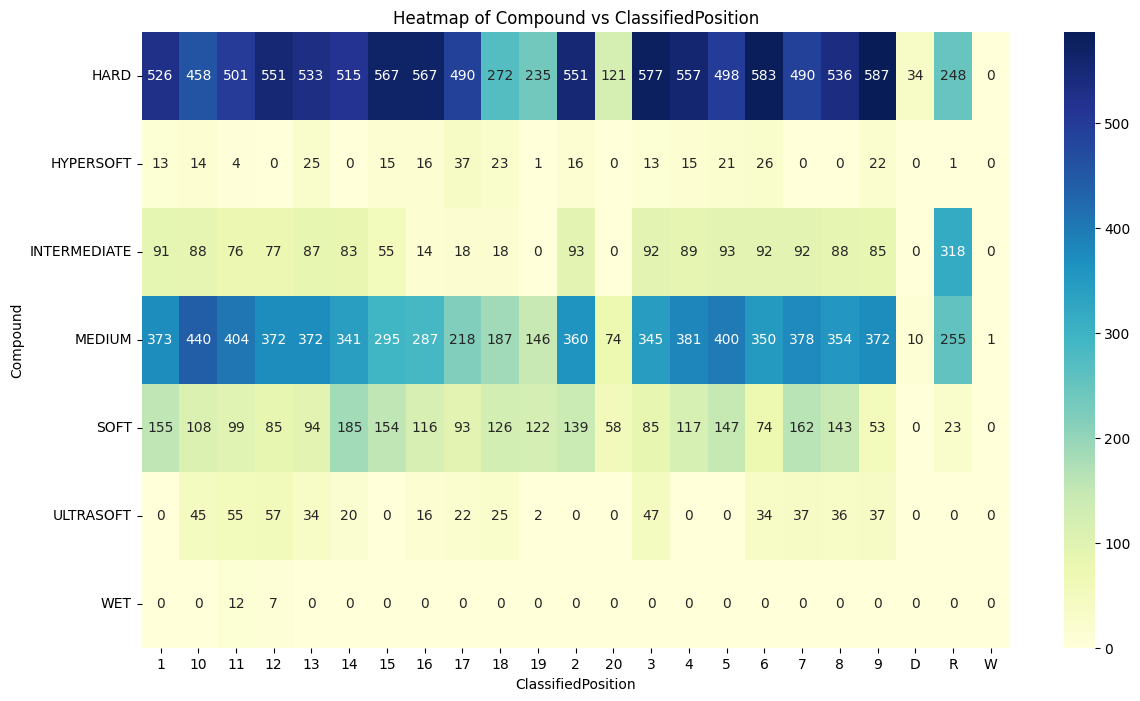

In [ ]:
contingency_table = pd.crosstab(merged_res_lap['Compound'], merged_res_lap['ClassifiedPosition'])
plt.figure(figsize=(14, 8))

sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Compound vs ClassifiedPosition')
plt.xlabel('ClassifiedPosition')
plt.ylabel('Compound')
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Statistic: {chi2}, p-value: {p}")

Chi2 Statistic: 2428.8009746457824, p-value: 0.0


In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
cramers_v(merged_res_lap['Compound'], merged_res_lap['ClassifiedPosition'])



0.13361738229245232

In [ ]:
df = res_lap_2024[(merged_res_lap['LapNumber'] == 1) & (merged_res_lap['Stint'] == 1)]
df.shape

(299, 55)

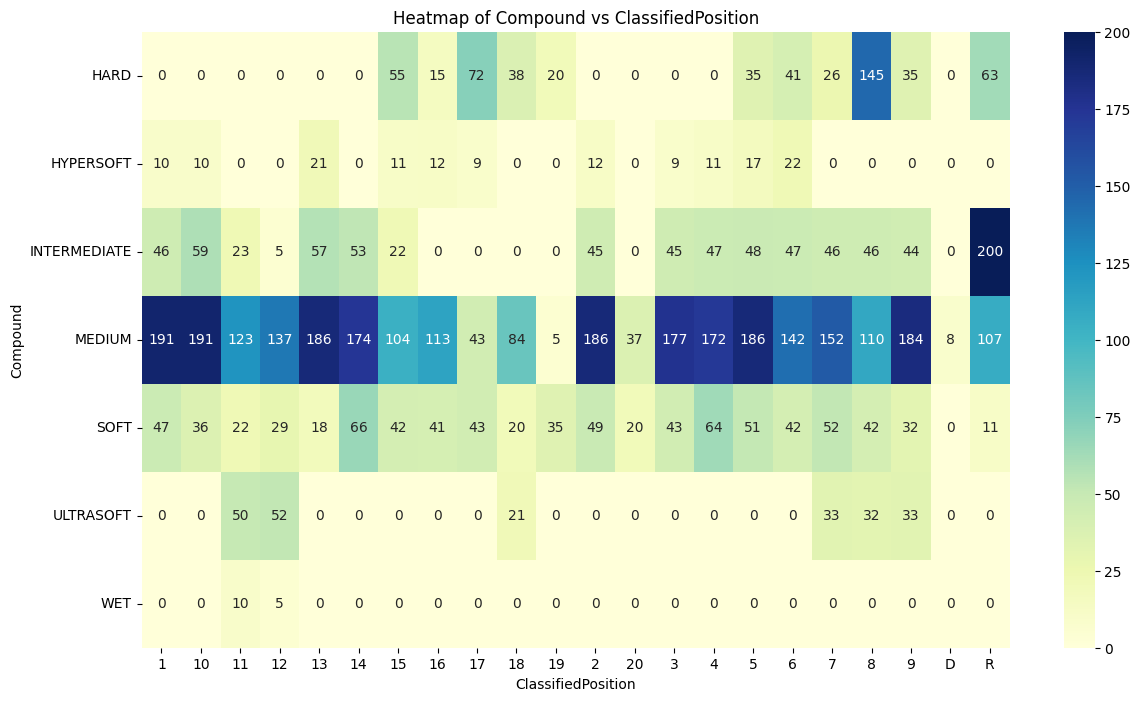

In [ ]:
merged_res_lap = merged_res_lap[merged_res_lap['IsAccurate']== True]
df = merged_res_lap[ (merged_res_lap['Stint'] == 1)]
contingency_table = pd.crosstab(df['Compound'], df['ClassifiedPosition'])

plt.figure(figsize=(14, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Compound vs ClassifiedPosition')
plt.xlabel('ClassifiedPosition')
plt.ylabel('Compound')
plt.show()
# ------------------------------------------------------------------------------

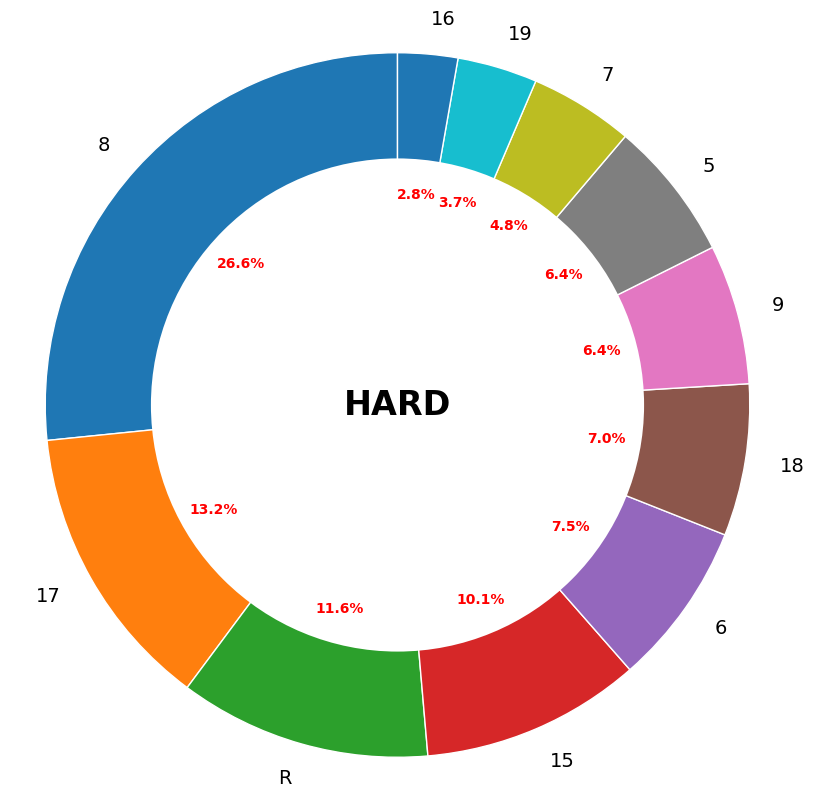

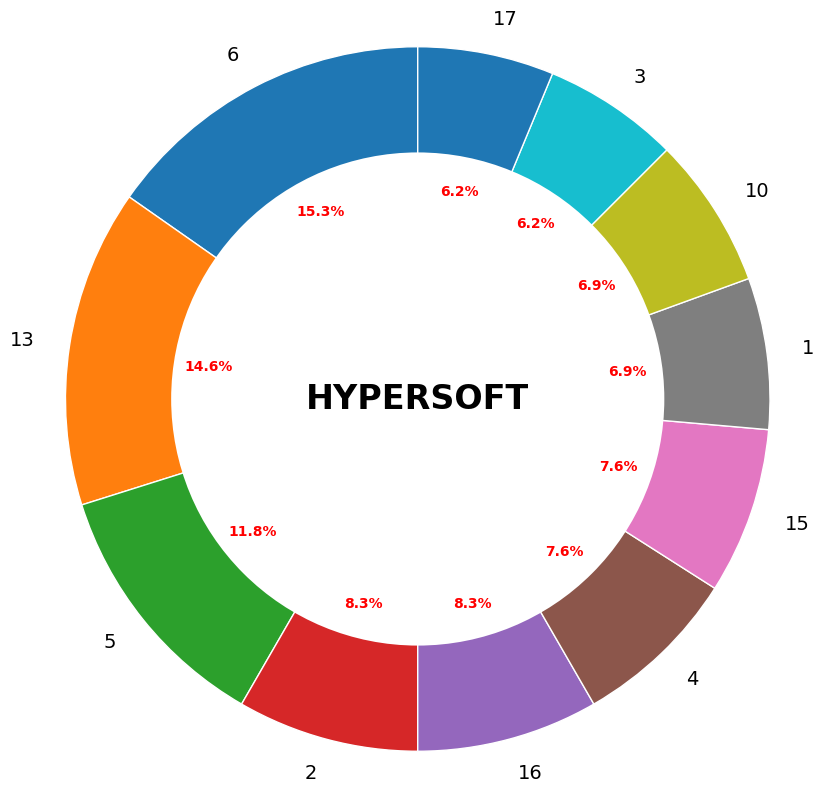

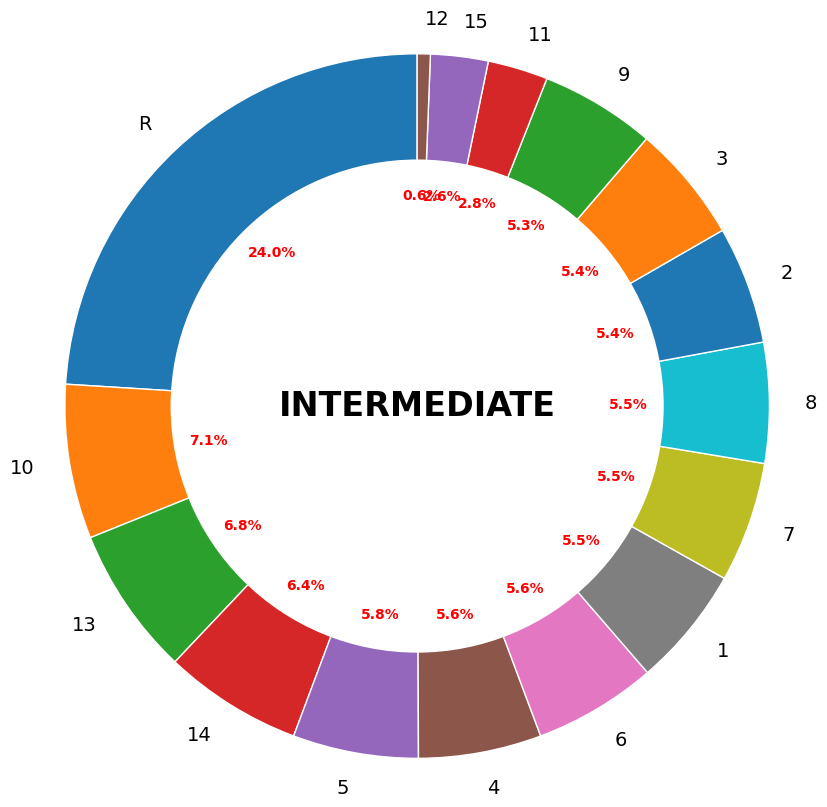

1         0.067923
10        0.067923
5         0.066145
2         0.066145
13        0.066145
9         0.065434
3         0.062945
14        0.061878
4         0.061166
7         0.054054
6         0.050498
12        0.048720
11        0.043741
16        0.040185
8         0.039118
R         0.038051
15        0.036984
Merged    0.033073
18        0.029872
Name: proportion, dtype: float64


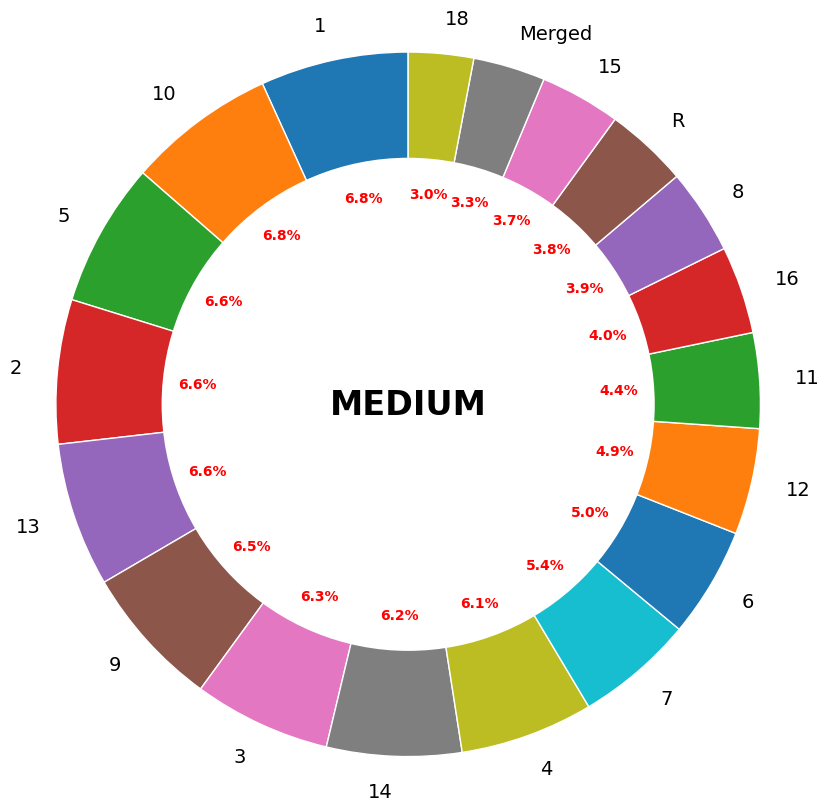

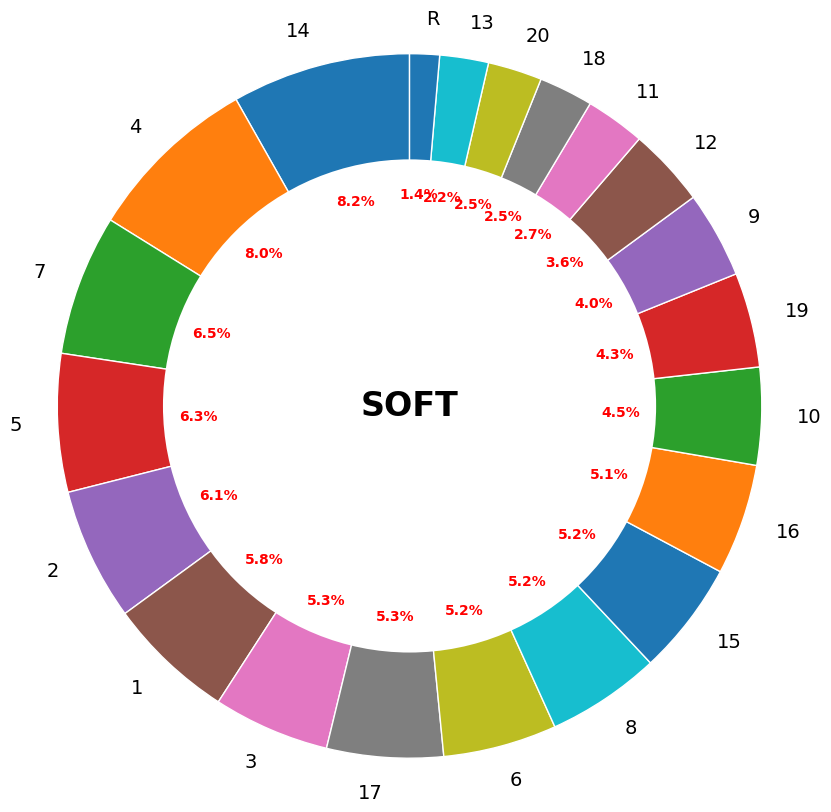

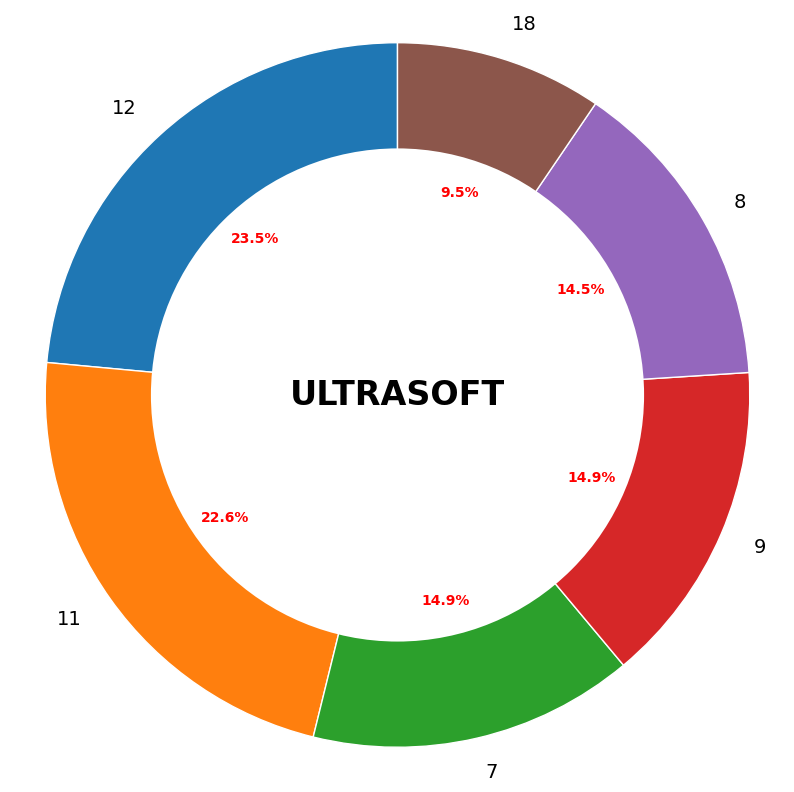

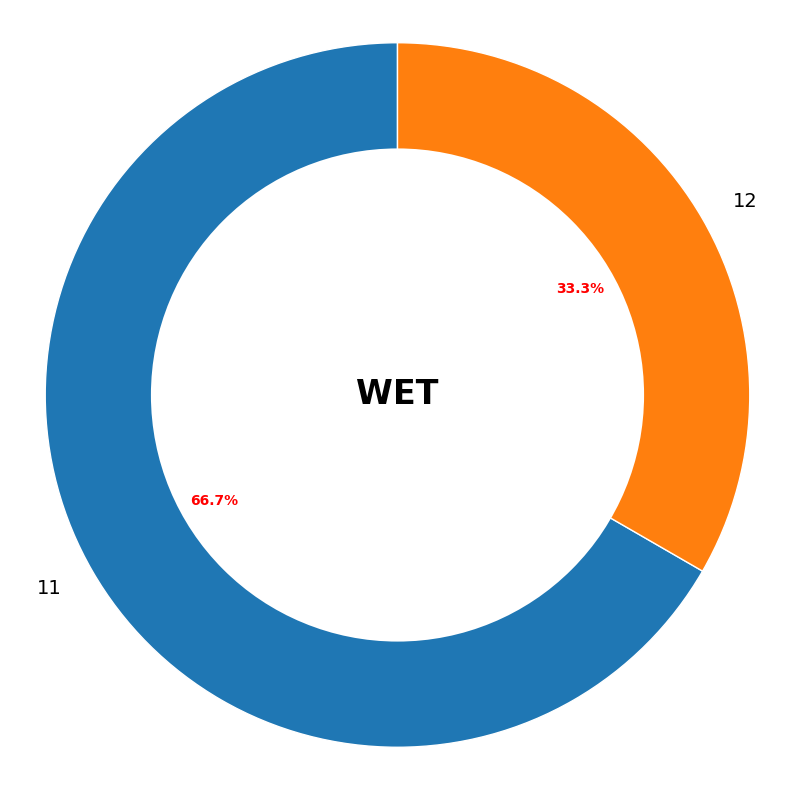

In [ ]:
def plot_donut_chart(positions, compound):


    if compound == 'MEDIUM':
        merged_positions = ['Merged' if pos in ['19', 'D', '17', '20'] else pos for pos in positions]
        position_counts = pd.Series(merged_positions).value_counts(normalize=True)
        print(position_counts)
        plt.figure(figsize=(10, 10))
    else:
        position_counts = pd.Series(positions).value_counts(normalize=True)
        plt.figure(figsize=(10, 10))
    wedges, texts, autotexts = plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90,  textprops={'fontsize': 14})
    for w in wedges:
        w.set_edgecolor('white')
    plt.setp(autotexts, size=10, weight='bold', color='red')
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.axis('equal')
    plt.text(0, 0, compound, ha='center', va='center', fontsize=24, weight='bold')
    plt.show()

df = merged_res_lap[(merged_res_lap['Stint'] == 1)]
grouped_df = df.groupby(['Compound']).agg({
    'ClassifiedPosition' : list,
    'Position_x' :list,
    'Driver' : list
}).reset_index()

for _, row in grouped_df.iterrows():
    compound = row['Compound']
    positions = row['ClassifiedPosition']
    flat_positions =[pos for sublist in positions for pos in sublist.split(',')]
    plot_donut_chart(flat_positions, compound)

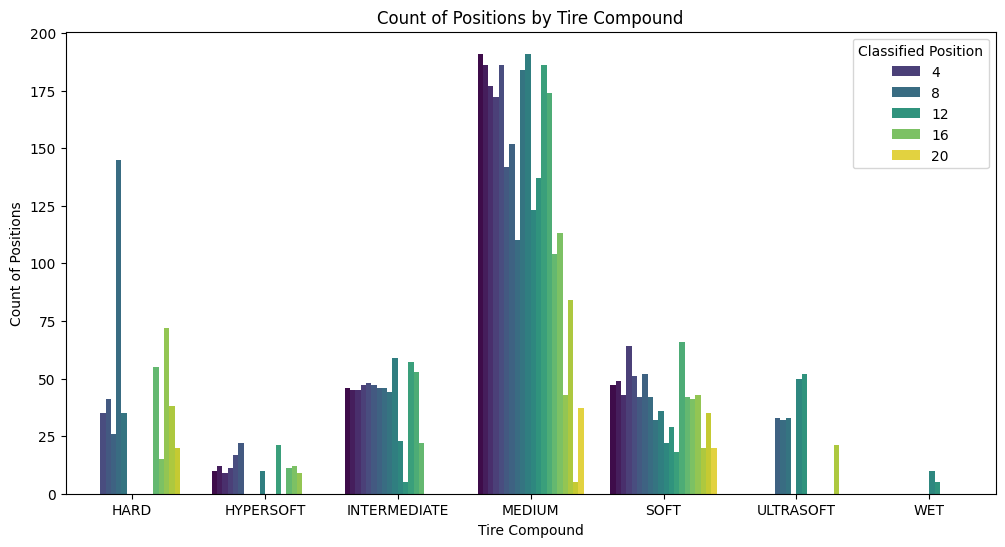

In [ ]:
df = merged_res_lap[(merged_res_lap['Stint'] == 1)]
grouped_df = df.groupby(['Compound']).agg({
    'ClassifiedPosition' : list,
    'Position_x' :list,
    'Driver' : list
}).reset_index()


# ----------------------------------count -plot ------------------------------------

grouped_df['ClassifiedPosition'] = grouped_df['ClassifiedPosition'].apply(lambda x: ','.join(x))
grouped_df['ClassifiedPosition'] = grouped_df['ClassifiedPosition'].str.split(',')
df_exploded = grouped_df.explode('ClassifiedPosition')

df_exploded['ClassifiedPosition'] = pd.to_numeric(df_exploded['ClassifiedPosition'], errors='coerce')
df_exploded = df_exploded.dropna(subset=['ClassifiedPosition'])

plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x='Compound', hue='ClassifiedPosition', palette='viridis')
plt.title('Count of Positions by Tire Compound')
plt.xlabel('Tire Compound')
plt.ylabel('Count of Positions')
plt.xticks()
plt.legend(title='Classified Position', loc='upper right')
plt.show()


### **Relationship 3: Number of Laps on a Compound vs Delta Time** 10 points

Task: Explore the relationship between the number of laps driven on a particular tire compound and the delta time (change in lap times) over those laps.

Objective: Understand how tire wear affects performance, particularly how lap times degrade as tires wear out during a stint.

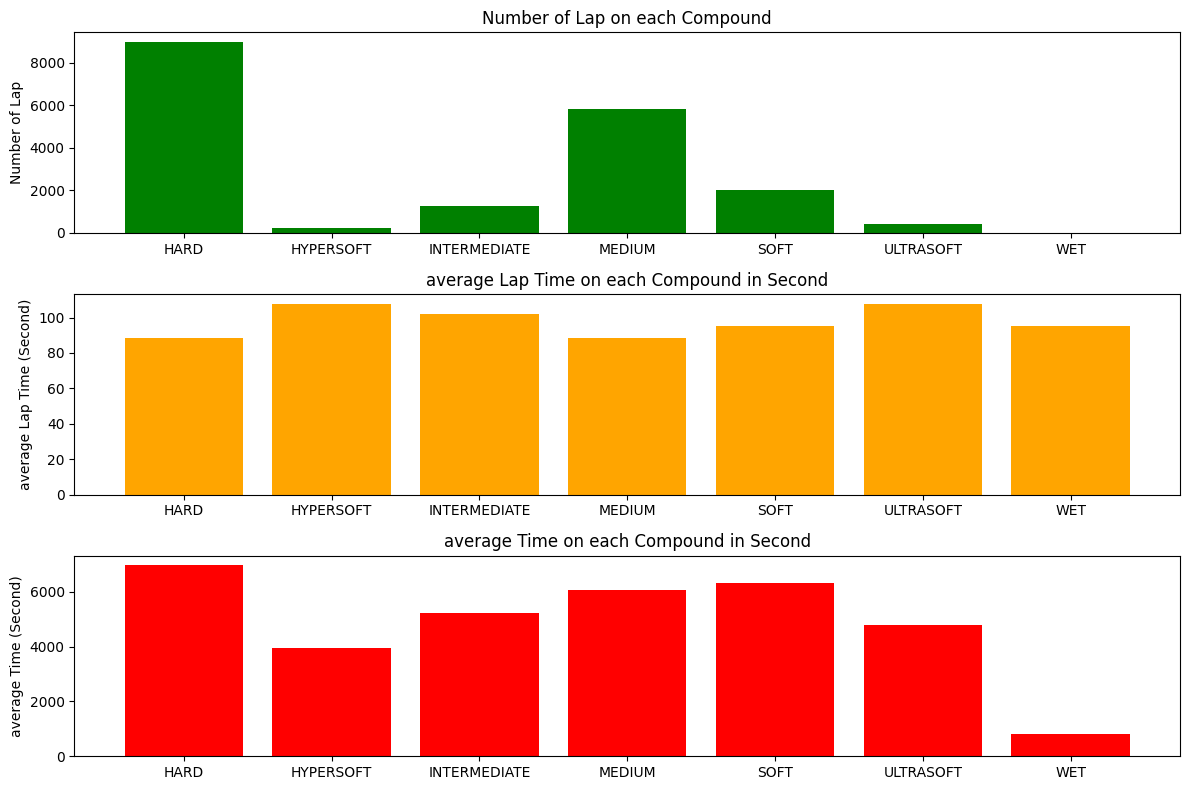

In [ ]:
merged_lap= merged_lap[merged_lap['IsAccurate']==True]

grouped_df = merged_lap.groupby(['Compound']).agg({
    'LapNumber' : 'count',
    'LapTime_in_sec' : 'mean',
    'Time_in_sec': 'mean',
}).reset_index()
grouped_df


# ------------------------------------------------------------------------
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

# Plotting the first bar plot
axes[0].bar(grouped_df['Compound'].unique(),grouped_df['LapNumber'] , color='green')
axes[0].set_title('Number of Lap on each Compound')
axes[0].set_ylabel('Number of Lap')

# Plotting the second bar plot
axes[1].bar(grouped_df['Compound'].unique(),grouped_df['LapTime_in_sec'] , color='orange')
axes[1].set_title('average Lap Time on each Compound in Second')
axes[1].set_ylabel('average Lap Time (Second)')

axes[2].bar(grouped_df['Compound'].unique(),grouped_df['Time_in_sec'] , color='red')
axes[2].set_title('average Time on each Compound in Second')
axes[2].set_ylabel('average Time (Second)')

# Adjust layout
plt.tight_layout()
plt.show()

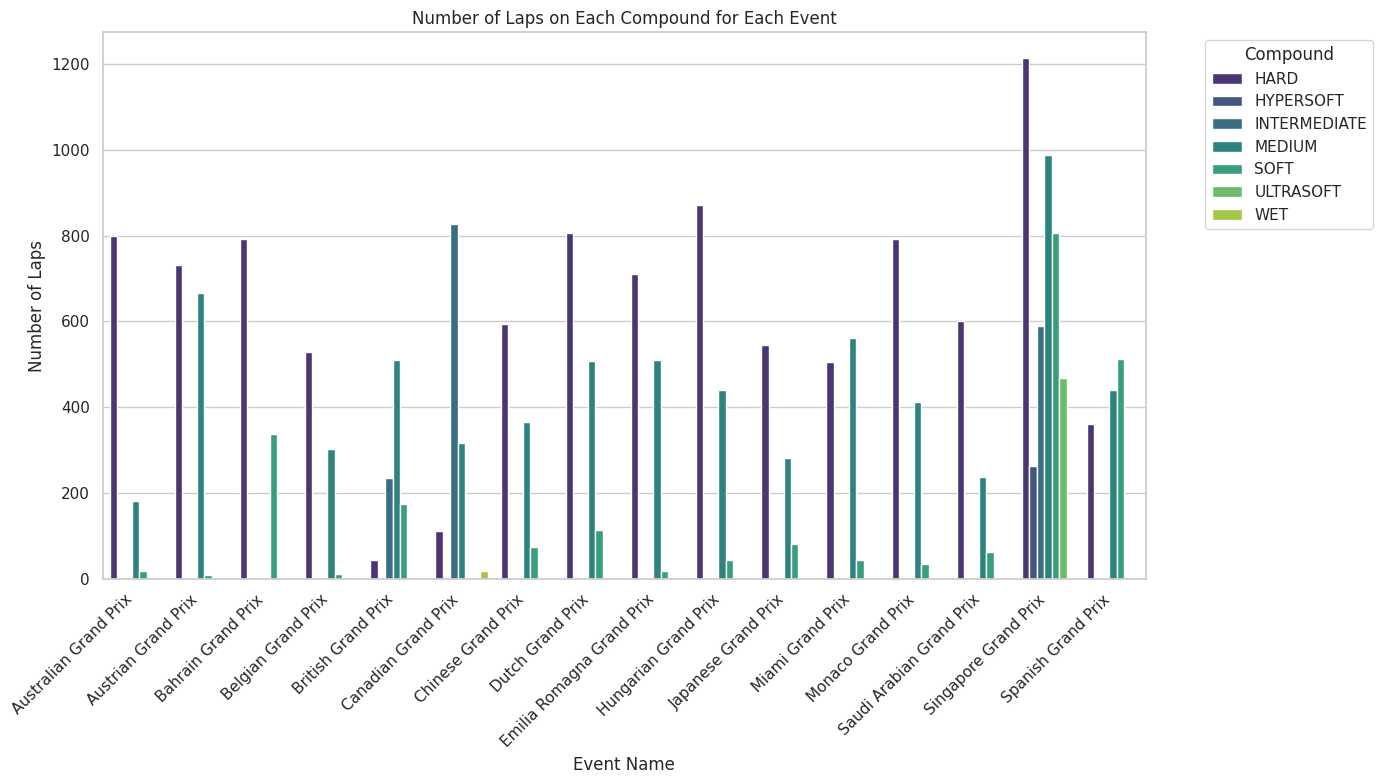

In [ ]:
merged_lap['EventName'].fillna('Singapore Grand Prix', inplace= True)
grouped_df = merged_lap.groupby(['Compound', 'EventName']).agg({
    'LapNumber' : 'count',
    'LapTime_in_sec' : 'sum'
}).reset_index()
grouped_df

# Set the style for the plot
sns.set(style='whitegrid')

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='EventName', y='LapNumber', hue='Compound', data=grouped_df, palette='viridis')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding title and labels
plt.title('Number of Laps on Each Compound for Each Event')
plt.xlabel('Event Name')
plt.ylabel('Number of Laps')
plt.legend(title='Compound', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### **Relationship 4: Number of Stops vs Final Position** 10 points

Task: Analyze the relationship between the number of pit stops a driver makes and their final position in the race.

Objective: Understand how the frequency of pit stops impacts race outcomes, particularly whether fewer or more stops lead to better results.


In [ ]:
result_2024['event_driverAbr'] = result_2024['EventName'] + '_' + result_2024['Abbreviation']
lap_2024['event_driverAbr'] = lap_2024['EventName'] + '_' + lap_2024['Driver']

result_sing['Year_driverAbr'] = result_sing['Year'].astype(str) + '_' + result_sing['Abbreviation']
lap_sing['Year_driverAbr'] = lap_sing['Year'].astype(str) + '_' + lap_sing['Driver']

res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driverAbr'])
res_lap_sing = pd.merge(result_sing, lap_sing, on=['Year_driverAbr'])
merged_res_lap = pd.concat([res_lap_2024, res_lap_sing], ignore_index=True)


(18787, 58)
correlation between number of Pit-Stops and final position based on driver  : 0.10529339379018707


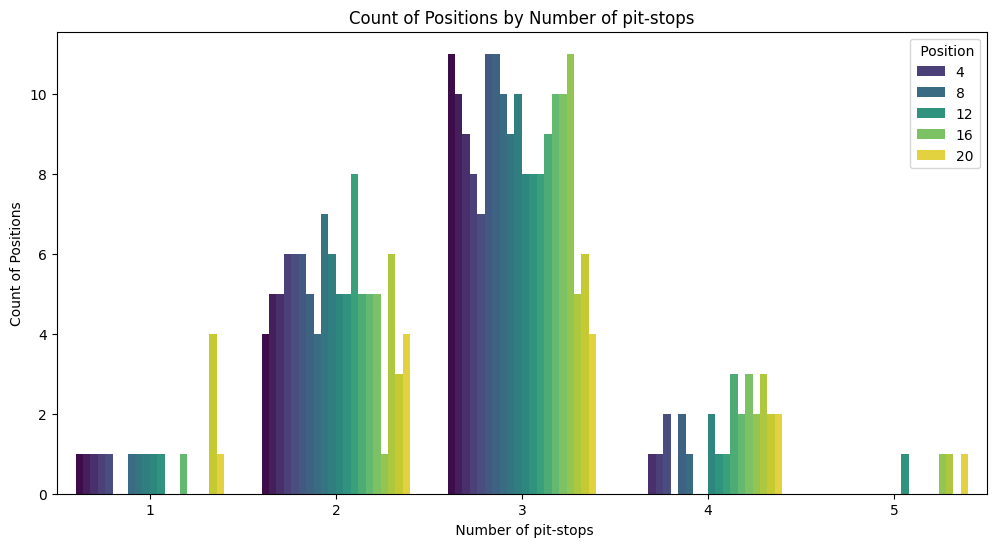

In [ ]:
merged_res_lap['EventName_x'].fillna('Singapore Grand Prix', inplace=True)
df = merged_res_lap[merged_res_lap['IsAccurate'] == True]
print(df.shape)
grouped_df = df.groupby(['Driver', 'EventName_x' ]).agg({
    'Stint' : lambda x: np.count_nonzero(np.unique(x)),
    'ClassifiedPosition' : 'first',
    'Position_x' : 'first',
}).reset_index()
corr_driver = grouped_df['Stint'].corr(grouped_df['Position_x'])
print (f'{yellow}correlation between number of Pit-Stops and final position based on driver {reset} : {corr_driver}')

grouped_df2 = grouped_df.groupby('Stint').agg({
    'Position_x' : list,
}).reset_index()

df_exploded = grouped_df2.explode('Position_x')


plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x='Stint', hue='Position_x', palette='viridis')
plt.title('Count of Positions by Number of pit-stops')
plt.xlabel(' Number of pit-stops')
plt.ylabel('Count of Positions')
plt.xticks()
plt.legend(title=' Position', loc='upper right')
plt.show()



### **Relationship 5: Race Length vs Strategy** 10 points

Task: Examine how the total number of laps in each race influenced the pit stop strategy and tire choices for teams and drivers.

Objective: Understand how race length affects strategic decisions, particularly in terms of the number of stops and tire choices.

In [ ]:
from collections import Counter
merged_lap['EventName'].fillna('Singapore Grand Prix', inplace= True)

merged_lap =merged_lap[merged_lap['IsAccurate'] == True]

df = merged_lap.groupby(['EventName', 'Driver' ,'Stint']).agg({
    'Compound' :  lambda x : list(set(x)),
    'LapNumber' : 'max',

}).reset_index()

df2 = df.groupby(['EventName', 'Driver' ,]).agg({
    'Compound' :  lambda x: sum(x, []),
    'Stint' : 'max',
    'LapNumber' : 'max',

}).reset_index()
df2

df3 = df2.groupby(['EventName']).agg({
    'Compound' :  lambda x: dict(Counter(sum(x, []))),
    'Stint' : 'mean',
    'LapNumber' : 'max',

}).reset_index()
df3 ['event_totla_lap'] = df3['EventName'] + '_'+ (df3['LapNumber']).astype(int).astype(str)
df3 = df3.sort_values(by='LapNumber', ascending=True)

df3

,EventName,Compound,Stint,LapNumber,event_totla_lap
3,Belgian Grand Prix,"{'MEDIUM': 25, 'HARD': 27, 'SOFT': 2}",2.700000,44.0,Belgian Grand Prix_44
13,Saudi Arabian Grand Prix,"{'MEDIUM': 17, 'HARD': 15, 'SOFT': 6}",2.000000,50.0,Saudi Arabian Grand Prix_50
4,British Grand Prix,"{'MEDIUM': 24, 'INTERMEDIATE': 22, 'SOFT': 14,...",3.368421,52.0,British Grand Prix_52
10,Japanese Grand Prix,"{'SOFT': 8, 'MEDIUM': 17, 'HARD': 28}",3.944444,53.0,Japanese Grand Prix_53
6,Chinese Grand Prix,"{'MEDIUM': 27, 'HARD': 25, 'SOFT': 6}",2.950000,56.0,Chinese Grand Prix_56
0,Australian Grand Prix,"{'MEDIUM': 16, 'HARD': 36, 'SOFT': 3}",2.894737,57.0,Australian Grand Prix_57
2,Bahrain Grand Prix,"{'SOFT': 25, 'HARD': 37}",3.150000,57.0,Bahrain Grand Prix_57
11,Miami Grand Prix,"{'MEDIUM': 25, 'HARD': 19, 'SOFT': 3}",2.400000,57.0,Miami Grand Prix_57
14,Singapore Grand Prix,"{'MEDIUM': 42, 'SOFT': 32, 'INTERMEDIATE': 21,...",2.636364,62.0,Singapore Grand Prix_62
8,Emilia Romagna Grand Prix,"{'MEDIUM': 24, 'SOFT': 3, 'HARD': 19}",2.350000,63.0,Emilia Romagna Grand Prix_63


In [ ]:
df2['fullInfo'] = df2['EventName'].apply(lambda x: x.split(' ')[0]) + ' GP_' + df2['Driver'] + '_' + df2['LapNumber'].astype(int).astype(str)
df2

,EventName,Driver,Compound,Stint,LapNumber,fullInfo
0,Australian Grand Prix,ALB,"[MEDIUM, HARD, HARD]",3.0,56.0,Australian GP_ALB_56
1,Australian Grand Prix,ALO,"[HARD, MEDIUM, HARD]",3.0,56.0,Australian GP_ALO_56
2,Australian Grand Prix,BOT,"[MEDIUM, HARD, HARD]",3.0,55.0,Australian GP_BOT_55
3,Australian Grand Prix,GAS,"[MEDIUM, HARD, HARD]",3.0,55.0,Australian GP_GAS_55
4,Australian Grand Prix,HAM,"[SOFT, HARD]",2.0,15.0,Australian GP_HAM_15
...,...,...,...,...,...,...
319,Spanish Grand Prix,SAR,"[SOFT, MEDIUM, HARD]",3.0,64.0,Spanish GP_SAR_64
320,Spanish Grand Prix,STR,"[SOFT, MEDIUM, HARD]",3.0,65.0,Spanish GP_STR_65
321,Spanish Grand Prix,TSU,"[SOFT, MEDIUM, HARD, SOFT]",4.0,65.0,Spanish GP_TSU_65
322,Spanish Grand Prix,VER,"[SOFT, MEDIUM, SOFT]",3.0,66.0,Spanish GP_VER_66


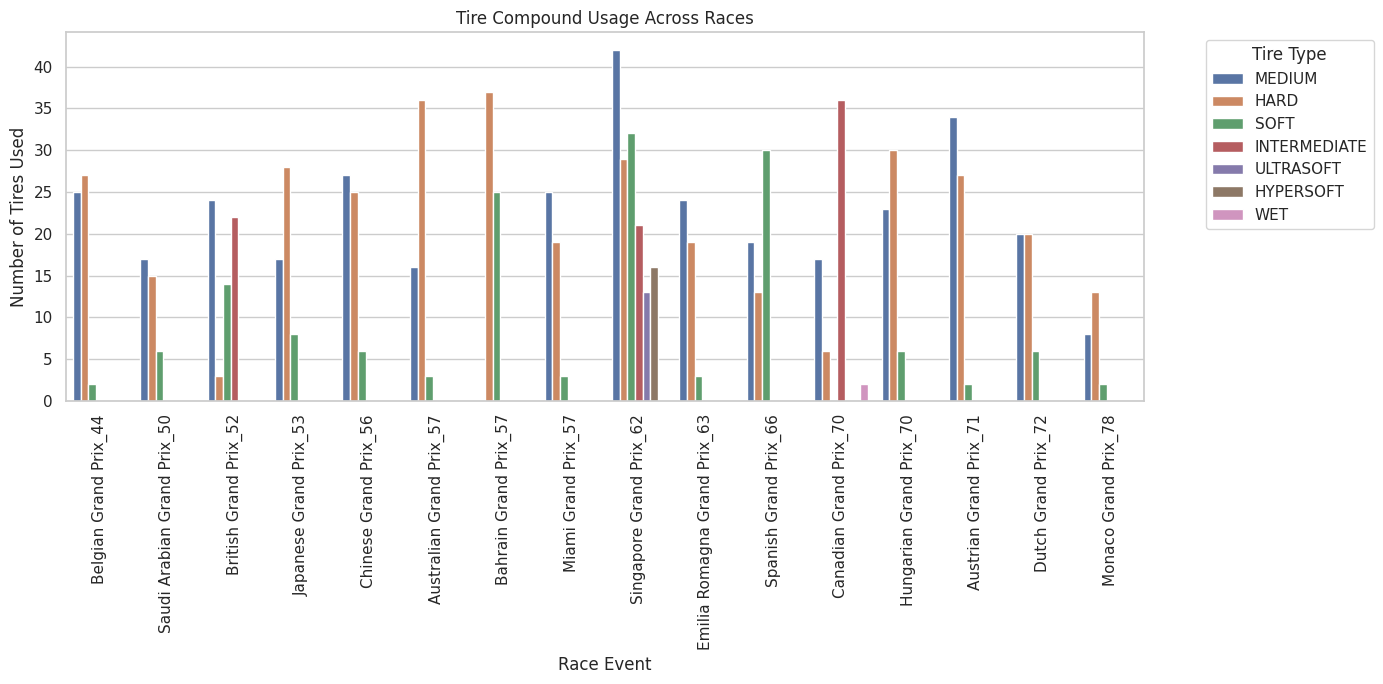

In [ ]:

compound_data = df3['Compound'].apply(pd.Series).fillna(0)
compound_data = compound_data.astype(int)

visualization_data = pd.concat([df3[['event_totla_lap', 'Stint']], compound_data], axis=1)

melted_data = visualization_data.melt(id_vars=['event_totla_lap', 'Stint'],
                                        value_vars=list(compound_data.columns),
                                        var_name='Tire Compound', value_name='Count')

plt.figure(figsize=(14, 7))
sns.barplot(data=melted_data, x='event_totla_lap', y='Count', hue='Tire Compound')
plt.title('Tire Compound Usage Across Races')
plt.xticks(rotation=90)
plt.xlabel('Race Event')
plt.ylabel('Number of Tires Used')
plt.legend(title='Tire Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

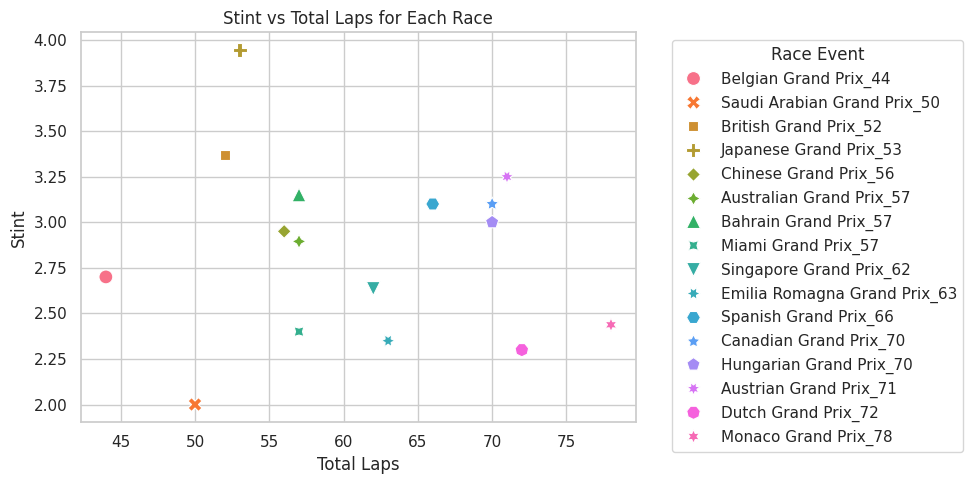

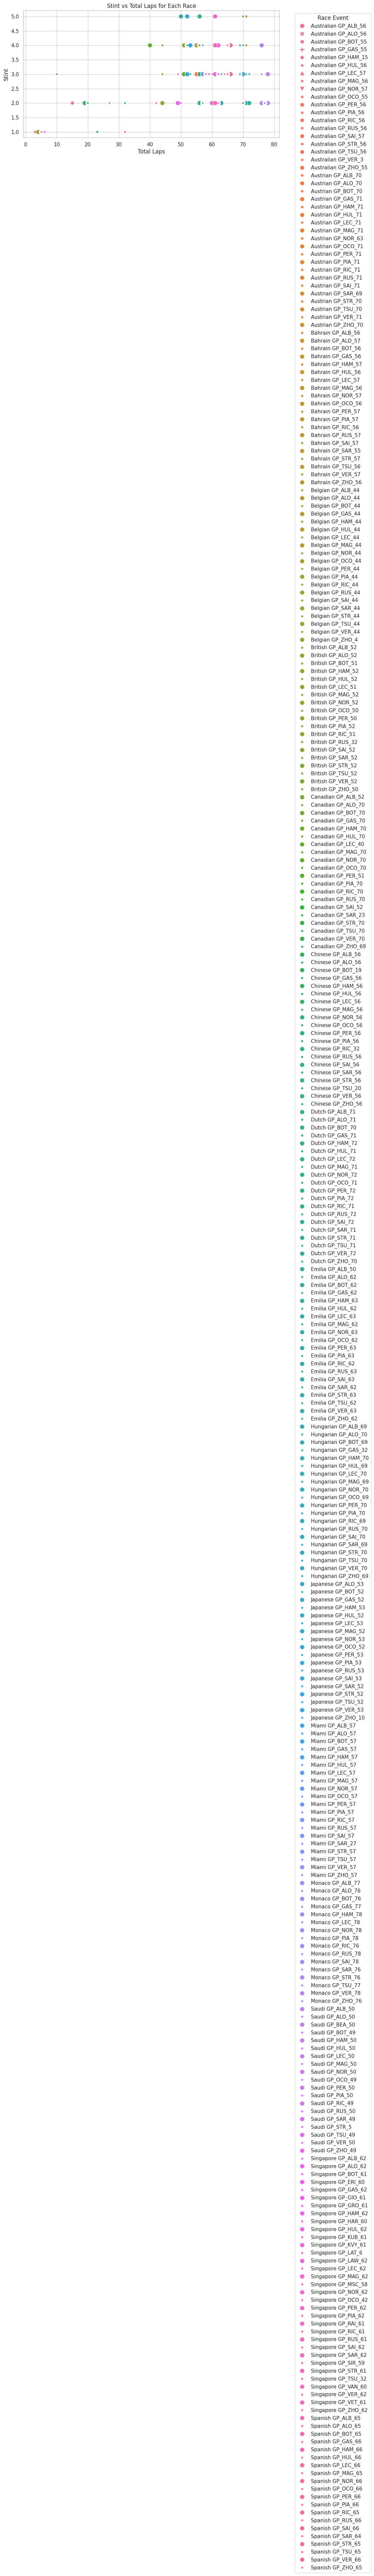

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df3, x='LapNumber', y='Stint', hue='event_totla_lap', style='event_totla_lap', s=100)
plt.title('Stint vs Total Laps for Each Race')
plt.xlabel('Total Laps')
plt.ylabel('Stint')
plt.grid(True)
plt.legend(title='Race Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------------------per driver ---------------------------

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df2, x='LapNumber', y='Stint', hue='fullInfo', style='fullInfo', s=100)
plt.title('Stint vs Total Laps for Each Race')
plt.xlabel('Total Laps')
plt.ylabel('Stint')
plt.grid(True)
plt.legend(title='Race Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

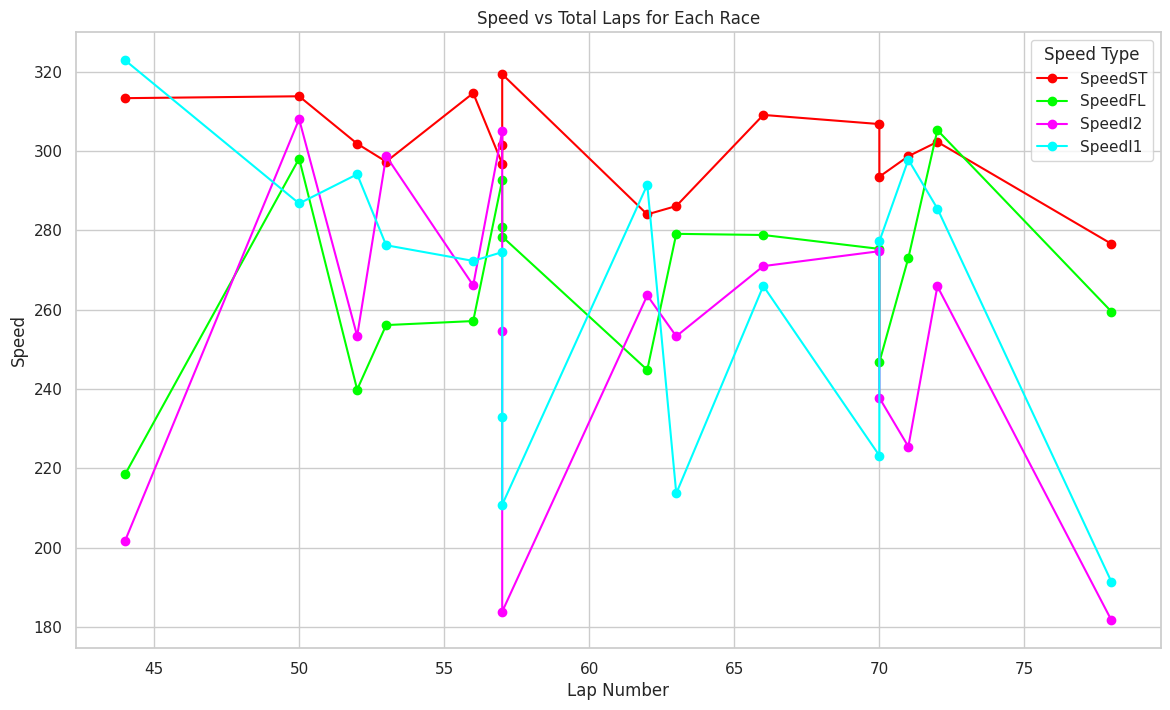

In [ ]:

merged_lap =merged_lap[merged_lap['IsAccurate'] == True]
grouped_df = merged_lap.groupby(['EventName', 'Driver']).agg({

    'SpeedST' : 'mean',
    'SpeedFL': 'mean',
    'SpeedI2':'mean',
    'SpeedI1' : 'mean'

}).reset_index()
grouped_df

grouped_df2 = grouped_df.groupby(['EventName' ]).agg({
    'SpeedST' : 'mean',
    'SpeedFL': 'mean',
    'SpeedI2':'mean',
    'SpeedI1' : 'mean',
}).reset_index()


grouped_df2 [['LapNumber' , 'event_totla_lap']] = df3[['LapNumber', 'event_totla_lap']]
df = grouped_df2.sort_values(by='LapNumber', ascending=True)
df

plt.figure(figsize=(14, 8))

for i, col in enumerate(['SpeedST', 'SpeedFL', 'SpeedI2', 'SpeedI1']):
    plt.plot(df['LapNumber'], df[col], marker='o', label=col, color=list(colors.values())[i])

plt.title('Speed vs Total Laps for Each Race')
plt.xlabel('Lap Number')
plt.ylabel('Speed')
plt.legend(title='Speed Type')
plt.grid(True)
plt.show()


### **Relationship 6: weather and strategy**


In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
result_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/result_2024.csv')
weather_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/weather_2024.csv')

deltaTime_cols = ['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time' ,
                  'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                  'LapStartTime', 'PitOutTime','PitInTime' ]

lap_2024= convert_to_timedelta(lap_2024 , deltaTime_cols)

lap_2024 = conver_deltatime_to_second (lap_2024 , deltaTime_cols)
result_2024['event_driverAbr'] = result_2024['EventName'] + '_' + result_2024['Abbreviation']
lap_2024['event_driverAbr'] = lap_2024['EventName'] + '_' + lap_2024['Driver']

res_lap_2024 = pd.merge(result_2024, lap_2024, on=['event_driverAbr'])
we_res_lap_2024 = pd.merge(res_lap_2024, weather_2024, left_on=['EventName_x'] , right_on=['EventName'])
print(f'{orange}{bold} we_res_lap_2024 : {reset} {we_res_lap_2024.shape} ')

 we_res_lap_2024 :  (2609120, 75) 


In [ ]:
lap_sing = pd.read_csv('ocean_data_challenge_F1_data/singapore_grand_prix_races_2018-2019-2022-2023//lap_singapore_grand_prix_2018-2019-2022-2023.csv')
result_sing = pd.read_csv('ocean_data_challenge_F1_data/singapore_grand_prix_races_2018-2019-2022-2023/result_singapore_grand_prix_2018-2019-2022-2023.csv')
weather_sing = pd.read_csv('ocean_data_challenge_F1_data/singapore_grand_prix_races_2018-2019-2022-2023/weather_singapore_grand_prix_2018-2019-2022-2023.csv')

deltaTime_cols = ['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time' ,
                  'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                  'LapStartTime', 'PitOutTime','PitInTime' ]

lap_sing= convert_to_timedelta(lap_sing , deltaTime_cols)

lap_sing = conver_deltatime_to_second (lap_sing , deltaTime_cols)


result_sing['Year_driverAbr'] = result_sing['Year'].astype(str) + '_' + result_sing['Abbreviation']
lap_sing['Year_driverAbr'] = lap_sing['Year'].astype(str) + '_' + lap_sing['Driver']
res_lap_sing = pd.merge(result_sing, lap_sing, on=['Year_driverAbr'])

we_res_lap_sing = pd.merge(res_lap_sing, weather_sing, left_on=['Year_x'] , right_on=['Year'])


In [ ]:
merged_we_res_lap = pd.concat([we_res_lap_2024, we_res_lap_sing], ignore_index=True)
merged_we_res_lap['EventName'].fillna('Singapore GP', inplace=True)

In [ ]:
merged_we_res_lap = merged_we_res_lap[merged_we_res_lap['IsAccurate'] == True]
df = merged_we_res_lap.groupby([ 'Driver','EventName' , 'Stint']).agg({
    'Compound': lambda x : (list(set(x))),
    'AirTemp' : 'mean',
    'Humidity' : 'mean',
    'Humidity' : 'mean',
    'Pressure' : 'mean',
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'Rainfall' : lambda x : (list(set(x))),
    'LapTime_in_sec' : 'mean'
}).reset_index()

df2 = df.groupby(['Driver','EventName' ]).agg({
    'Stint' :  'max',
    'Compound': lambda x : sum(x, []),
    'AirTemp' : 'mean',
    'Humidity' : 'mean',
    'Humidity' : 'mean',
    'Pressure' : 'mean',
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'Rainfall' : lambda x : sum(x, []),
    'LapTime_in_sec' : 'mean'
}).reset_index()

df3 = df2.groupby(['EventName']).agg({
    'Driver' : lambda x: (list(set(x))),
    'Stint' :  lambda x : (list(x)),
    'Compound': lambda x : sum(x, []),
    'AirTemp' : 'mean',
    'Humidity' : 'mean',
    'Humidity' : 'mean',
    'Pressure' : 'mean',
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'LapTime_in_sec' : 'mean',
    'Rainfall' : lambda x : sum(x, []),
}).reset_index()

df3

In [ ]:
df3.columns

Index(['EventName', 'Driver', 'Stint', 'Compound', 'AirTemp', 'Humidity',
       'Pressure', 'TrackTemp', 'WindSpeed', 'LapTime_in_sec', 'Rainfall',
       'mean_Stint'],
      dtype='object')

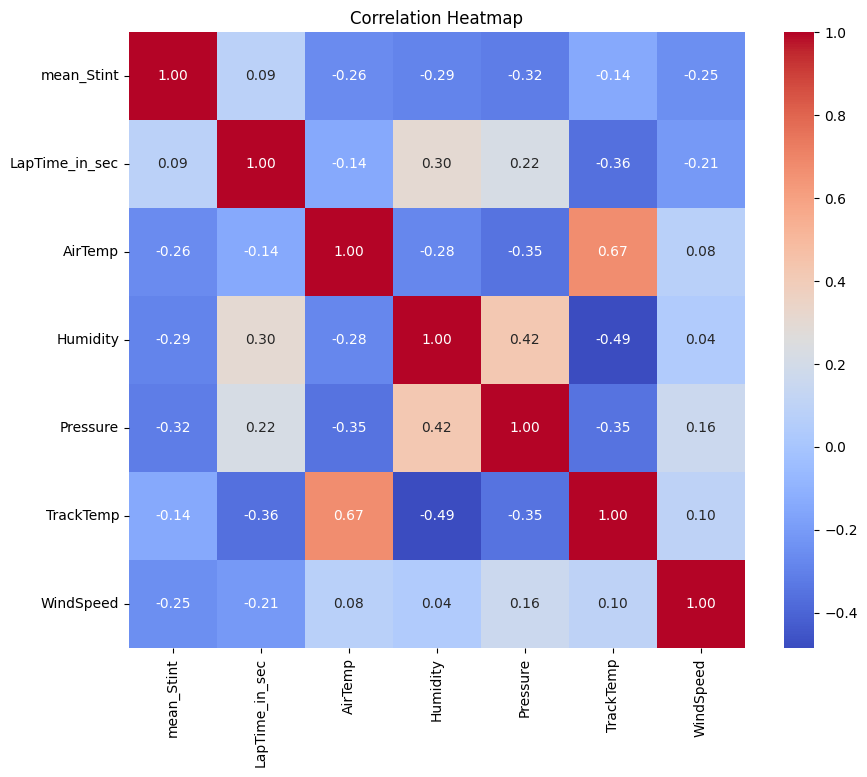

In [ ]:
df3['mean_Stint'] = df3['Stint'].apply(lambda x: sum(x) / len(x))
correlation_data = df3[['mean_Stint', 'LapTime_in_sec', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindSpeed']]

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

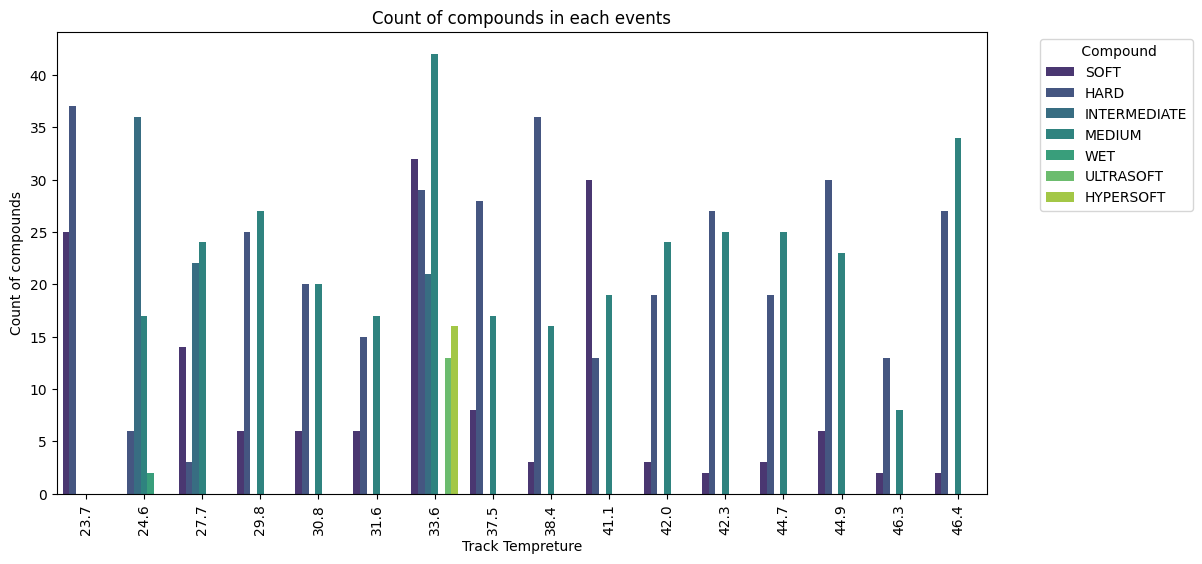

In [ ]:
df3 = df3.sort_values(by='TrackTemp', ascending=True)
df_exploded = df3.explode('Compound')
df_exploded['TrackTemp'] = df_exploded['TrackTemp'].round(1)

plt.figure(figsize=(12, 6))
sns.countplot(data=df_exploded, x='TrackTemp', hue='Compound', palette='viridis')
plt.title('Count of compounds in each events')
plt.xlabel('Track Tempreture')
plt.ylabel('Count of compounds')
plt.xticks(rotation=90)

plt.legend(title=' Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


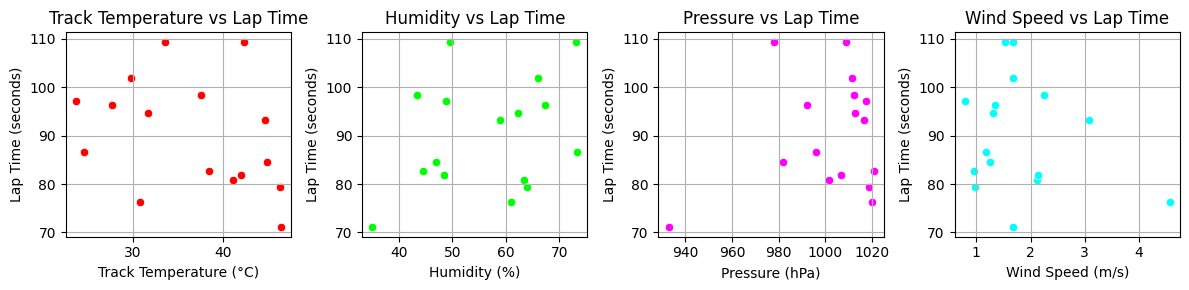

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(12, 3))

# Scatter plot for Track Temperature vs Lap Time
sns.scatterplot(x='TrackTemp', y='LapTime_in_sec', data=df3,  color = list(colors.values())[0], ax=axs[0])
axs[0].set_title('Track Temperature vs Lap Time')
axs[0].set_xlabel('Track Temperature (°C)')
axs[0].set_ylabel('Lap Time (seconds)')
axs[0].grid(True)

# Scatter plot for Humidity vs Lap Time
sns.scatterplot(x='Humidity', y='LapTime_in_sec', data=df3,  color = list(colors.values())[1], ax=axs[1])
axs[1].set_title('Humidity vs Lap Time')
axs[1].set_xlabel('Humidity (%)')
axs[1].set_ylabel('Lap Time (seconds)')
axs[1].grid(True)

# Scatter plot for Pressure vs Lap Time
sns.scatterplot(x='Pressure', y='LapTime_in_sec', data=df3,  color = list(colors.values())[2], ax=axs[2])
axs[2].set_title('Pressure vs Lap Time')
axs[2].set_xlabel('Pressure (hPa)')
axs[2].set_ylabel('Lap Time (seconds)')
axs[2].grid(True)

# Scatter plot for Wind Speed vs Lap Time
sns.scatterplot(x='WindSpeed', y='LapTime_in_sec', data=df3,  color = list(colors.values())[3], ax=axs[3])
axs[3].set_title('Wind Speed vs Lap Time')
axs[3].set_xlabel('Wind Speed (m/s)')
axs[3].set_ylabel('Lap Time (seconds)')
axs[3].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

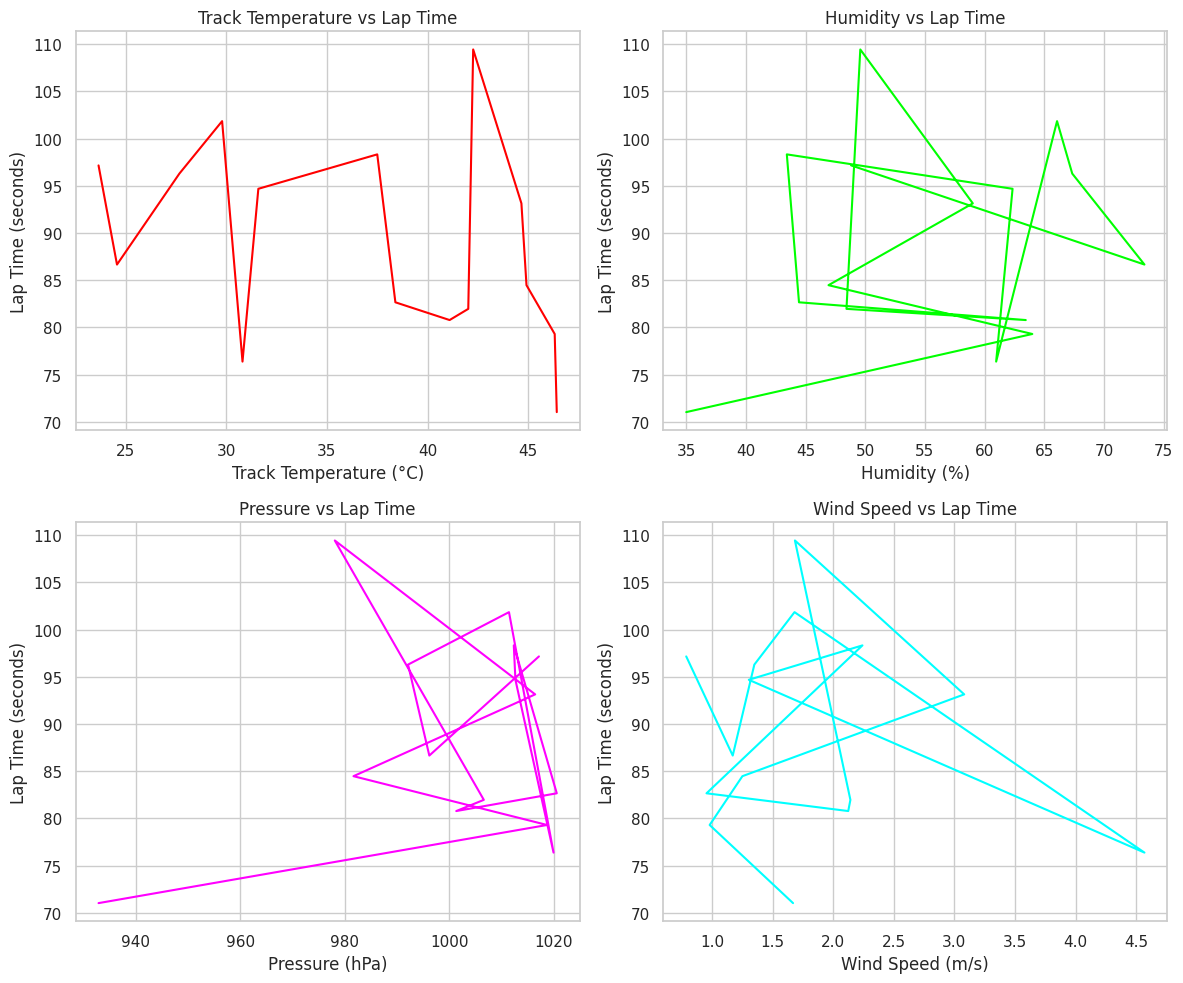

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(df3['TrackTemp'], df3['LapTime_in_sec'], color = list(colors.values())[0],)
axs[0, 0].set_title('Track Temperature vs Lap Time')
axs[0, 0].set_xlabel('Track Temperature (°C)')
axs[0, 0].set_ylabel('Lap Time (seconds)')
axs[0, 0].grid(True)

axs[0, 1].plot(df3['Humidity'], df3['LapTime_in_sec'],  color = list(colors.values())[1],)
axs[0, 1].set_title('Humidity vs Lap Time')
axs[0, 1].set_xlabel('Humidity (%)')
axs[0, 1].set_ylabel('Lap Time (seconds)')
axs[0, 1].grid(True)

axs[1, 0].plot(df3['Pressure'], df3['LapTime_in_sec'], color = list(colors.values())[2], )
axs[1, 0].set_title('Pressure vs Lap Time')
axs[1, 0].set_xlabel('Pressure (hPa)')
axs[1, 0].set_ylabel('Lap Time (seconds)')
axs[1, 0].grid(True)

axs[1,1].plot(df3['WindSpeed'],df3['LapTime_in_sec'],color = list(colors.values())[3], )
axs[1, 1].set_title('Wind Speed vs Lap Time')
axs[1, 1].set_xlabel('Wind Speed (m/s)')
axs[1, 1].set_ylabel('Lap Time (seconds)')
axs[1, 1].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

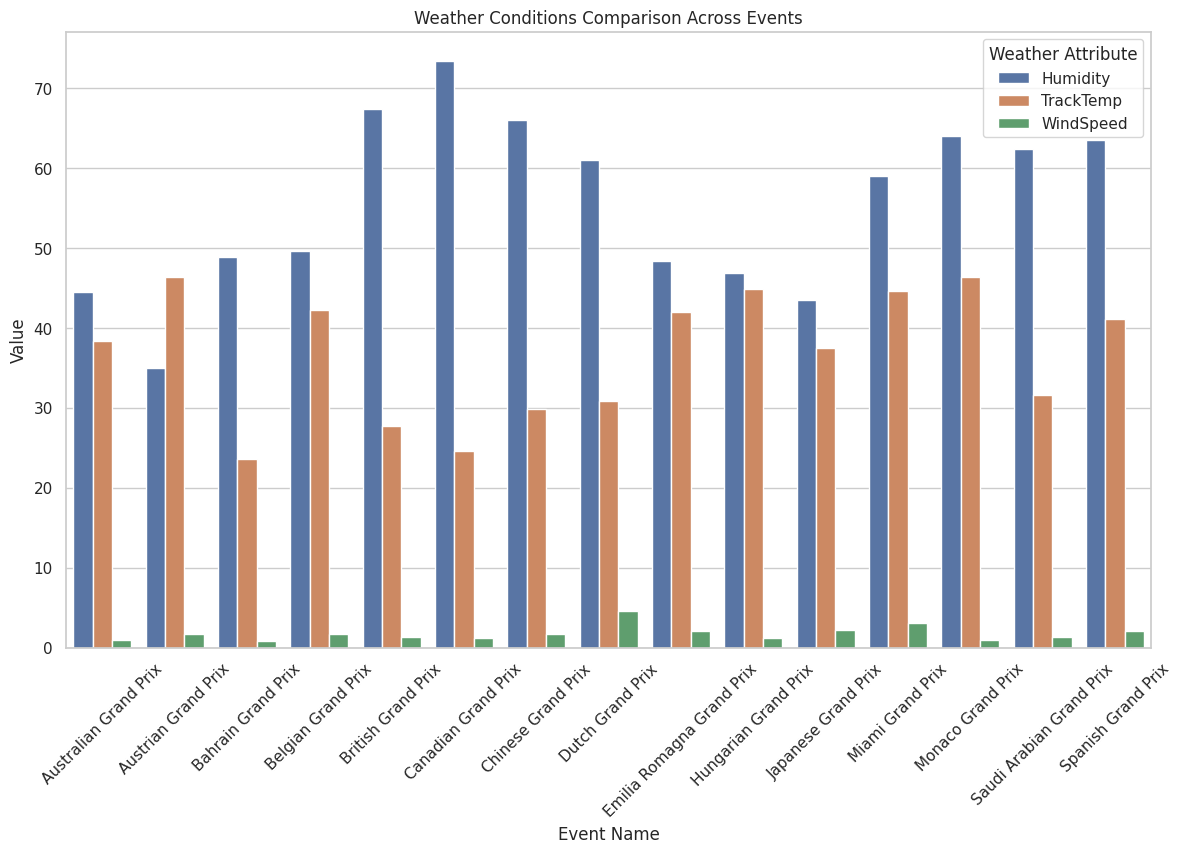

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Melt the DataFrame for easier plotting
df_melted = df3.melt(id_vars='EventName', value_vars=['Humidity', 'TrackTemp', 'WindSpeed'],
                    var_name='WeatherAttribute', value_name='Value')

# Create a bar plot
plt.figure(figsize=(14,8))
sns.barplot(x='EventName', y='Value', hue='WeatherAttribute', data=df_melted)

# Rotate x labels for better readability
plt.xticks(rotation=45)
plt.title('Weather Conditions Comparison Across Events')
plt.ylabel('Value')
plt.xlabel('Event Name')

# Show the legend
plt.legend(title='Weather Attribute')


### **Bonus Question** 5 points

Examine the relationship between attributes you consider significant in a race of your choice. Explain your reasoning for selecting these attributes and whether the race holds particular relevance.


In [ ]:
merged_we_res_lap.columns

Index(['EventName_x', 'DriverNumber_x', 'BroadcastName', 'Abbreviation',
       'DriverId', 'TeamName', 'TeamColor', 'TeamId', 'FirstName', 'LastName',
       'FullName', 'HeadshotUrl', 'CountryCode', 'Position_x',
       'ClassifiedPosition', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Time_x',
       'Status', 'Points', 'event_driverAbr', 'EventName_y', 'Time_y',
       'Driver', 'DriverNumber_y', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position_y', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'Time_in_sec', 'LapTime_in_sec',
       'Sector1Time_in_sec', 'Sector2Time_in_sec', 'Sector3Time_in_sec',
       'Sector1SessionTime_in_sec', 'Sector2SessionTime_in

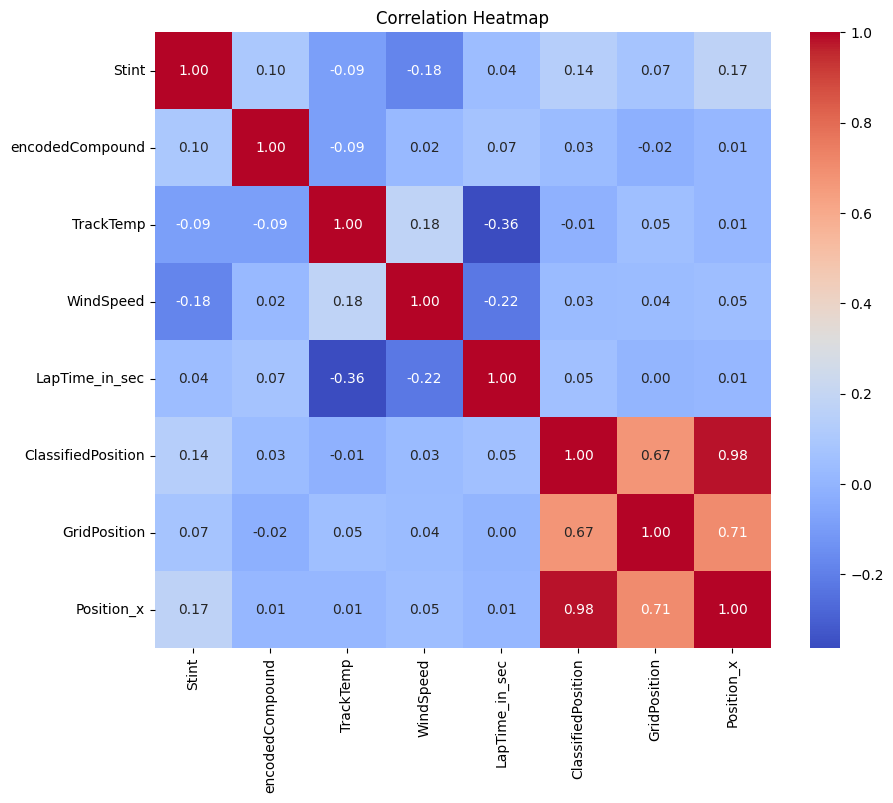

In [ ]:
merged_we_res_lap = merged_we_res_lap[merged_we_res_lap['IsAccurate'] == True]
# merged_we_res_lap['mean_Stint'] = merged_we_res_lap['Stint'].apply(lambda x: sum(x) / len(x))
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

merged_we_res_lap['encodedCompound'] = label_encoder.fit_transform(merged_we_res_lap['Compound'])

df = merged_we_res_lap.groupby([ 'EventName', 'Driver',  'Stint']).agg({
    'encodedCompound': 'first',
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'ClassifiedPosition' : 'min',
    'GridPosition' :'min',
    'Position_x':'min',
    'LapTime_in_sec' : 'mean',
    'SpeedFL' :'mean'
}).reset_index()

df2 = df.groupby(['Driver','EventName' ]).agg({
    'Stint' :  'max',
    'encodedCompound': list,
    'TrackTemp' : 'mean',
    'WindSpeed' : 'mean',
    'LapTime_in_sec' : 'mean',
    'ClassifiedPosition' :  'min',
    'GridPosition' : 'min',
    'Position_x':  'min',
})

df2 = df2.explode('encodedCompound')

df2['ClassifiedPosition']=df2['ClassifiedPosition'].replace('R', '22')
df2['ClassifiedPosition']=df2['ClassifiedPosition'].replace('D', '23')


correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()